In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud


In [2]:
data = pd.read_csv('./data/twitter_MBTI.csv', names=['Idx', 'text', 'label'], header=0)

In [3]:
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

le = LabelEncoder()
le.fit(data['label'].unique())
train_data['label'] = le.transform(train_data['label'])
test_data['label'] = le.transform(test_data['label'])

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

X_train = vectorizer.fit_transform(train_data['text'])
X_test = vectorizer.transform(test_data['text'])

In [4]:
class_map = {k:le.inverse_transform([k]) for k in range(16)}
custom_stop_words = ['i', 'im', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves',
                   'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
                   'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
                   'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with',
                   'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',
                   'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most',
                   'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should',
                   "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',
                   "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
                   "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "http", "https",'like', 'just', 'im', 'love', 'don', 'good', 'thank', 
                     'people', 'know', 'think','ur']

In [5]:
stop_words = custom_stop_words + list(ENGLISH_STOP_WORDS)

vectorizer = TfidfVectorizer(stop_words=stop_words)
le = LabelEncoder()

X_train = vectorizer.fit_transform(train_data['text'])
y_train = le.fit_transform(train_data['label'])

X_test = vectorizer.transform(test_data['text'])

mean_tfidf_by_label = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out()).groupby(y_train).mean()

for idx, row in mean_tfidf_by_label.iterrows():
    label = class_map[idx][0]
    print(f"Top 10 features for label {label}:")
    print(row.nlargest(10))
    print("\n")

Top 10 features for label enfj:
really    0.013154
lt        0.012915
day       0.012574
amp       0.012525
omg       0.012233
time      0.012198
today     0.011540
got       0.010835
yes       0.010795
want      0.010776
Name: 0, dtype: float64


Top 10 features for label enfp:
time      0.013100
lt        0.013012
omg       0.013003
oh        0.011541
really    0.011414
want      0.011210
got       0.011134
day       0.010867
need      0.010855
yes       0.010805
Name: 1, dtype: float64


Top 10 features for label entj:
gt        0.014378
time      0.013017
day       0.012368
want      0.011682
amp       0.011020
need      0.010946
really    0.010814
got       0.010772
yes       0.010751
lol       0.010320
Name: 2, dtype: float64


Top 10 features for label entp:
lt           0.012438
fuck         0.011841
dont         0.011592
fucking      0.011428
want         0.011420
omg          0.011280
time         0.011179
need         0.011153
entp         0.011095
literally    0.011083
Name

In [6]:
# lt means laugetrip, use when see something funny.
# gt means good try.

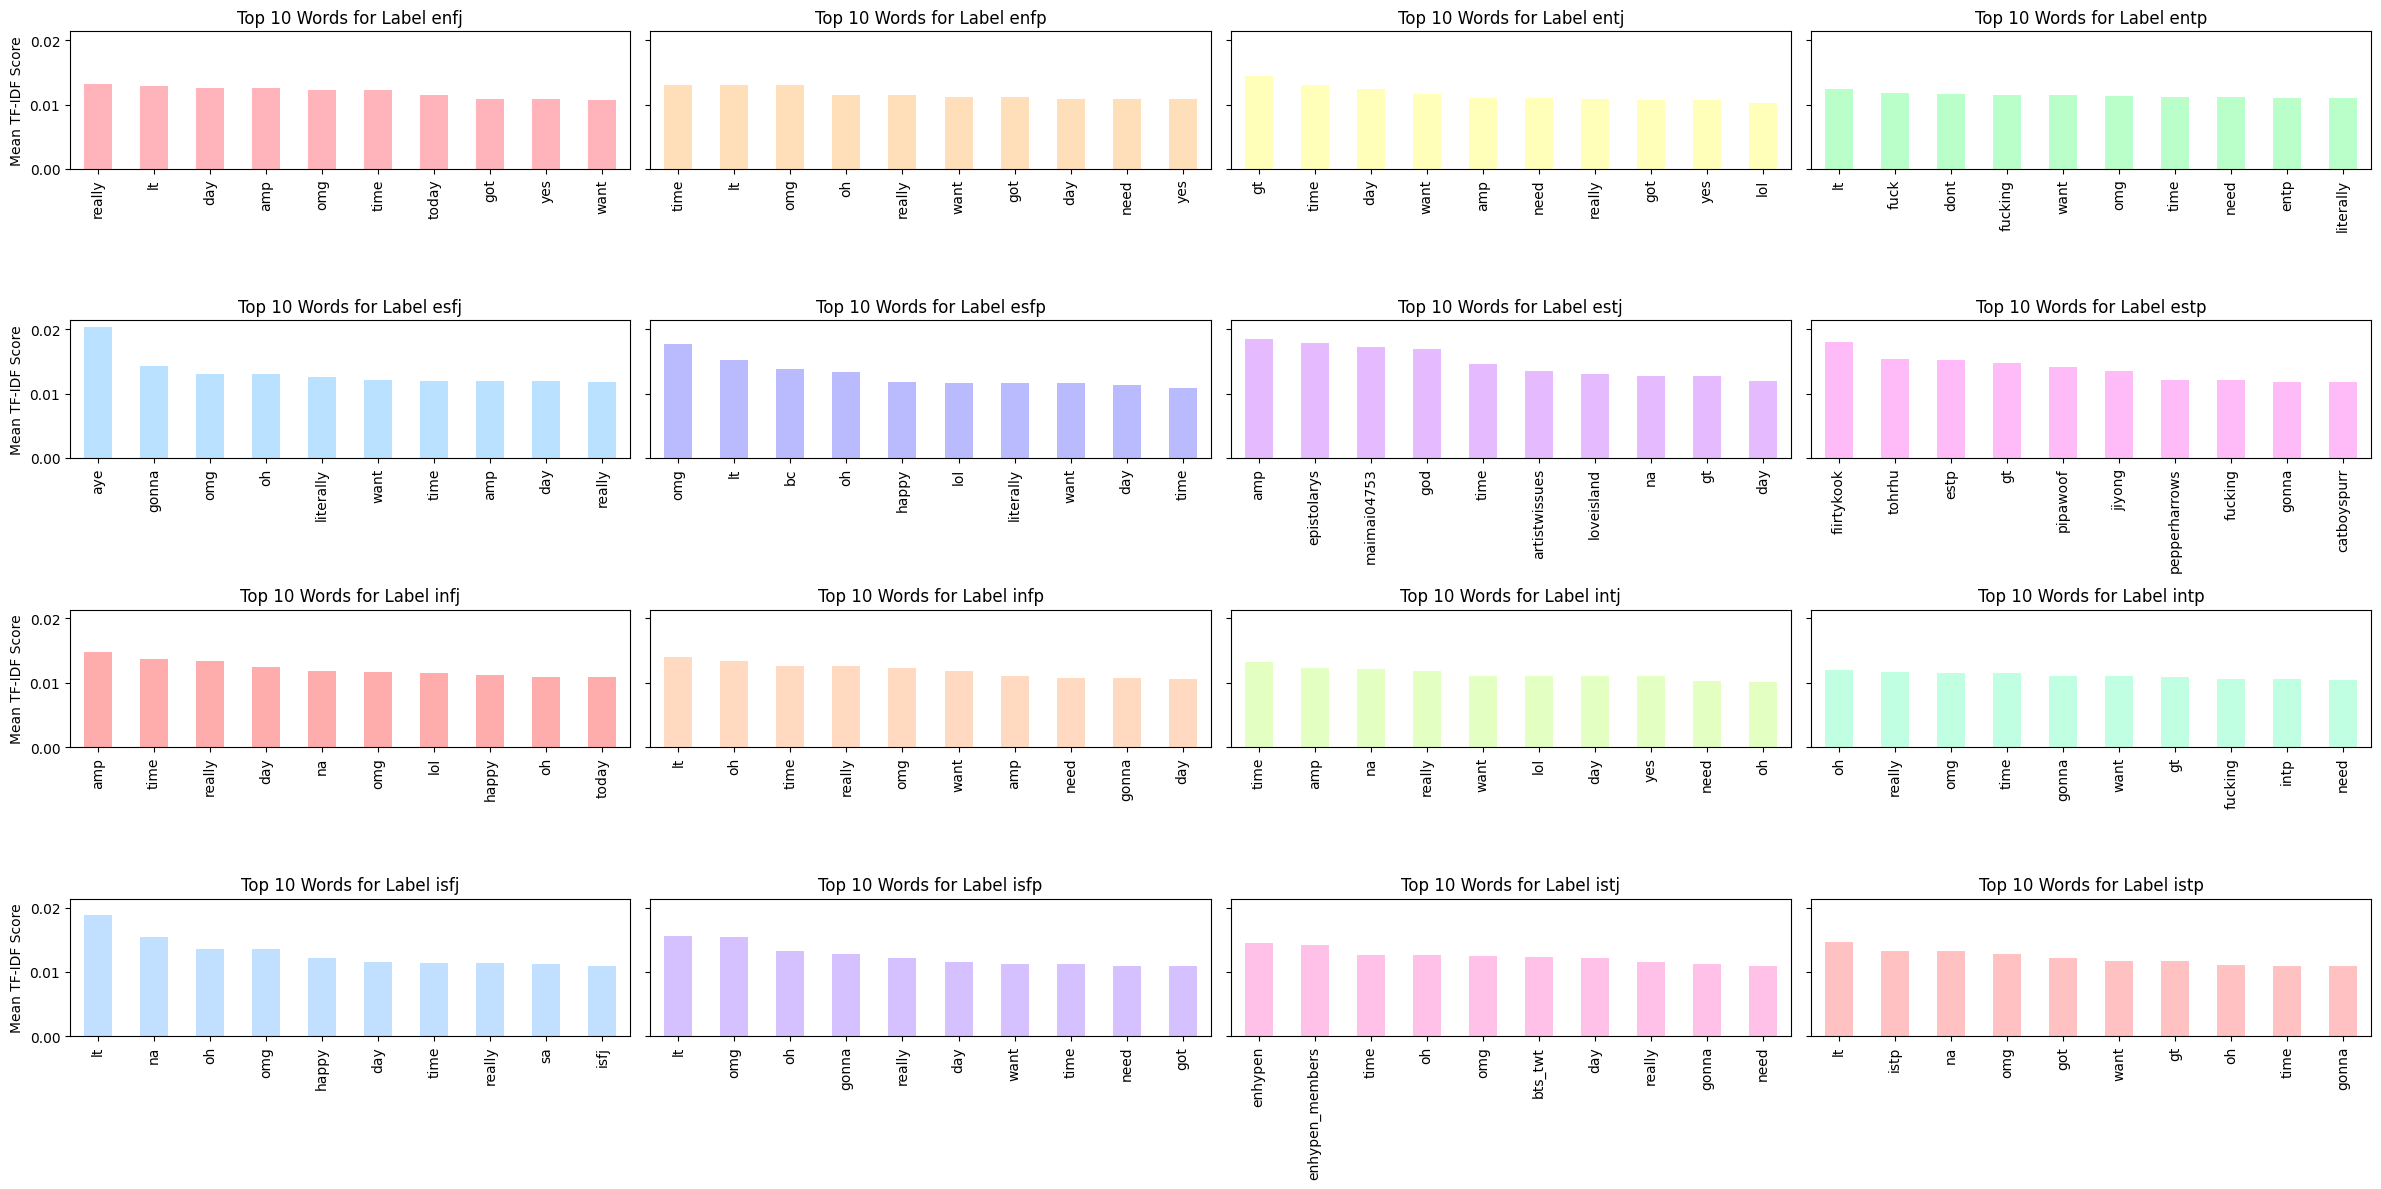

In [7]:
import matplotlib.pyplot as plt

# Define a list of pastel colors
pastel_colors = [
    '#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF', '#BABAFF',
    '#E6BAFF', '#FFBAF8', '#FFACAC', '#FFDAC1', '#E3FFC1', '#C1FFE3',
    '#C1DFFF', '#D5C1FF', '#FFC1E8', '#FFC1C1'
]

def plot_top_features(ax, row, label, color):
    row.nlargest(10).plot(kind='bar', color=color, ax=ax)
    ax.set_title(f"Top 10 Words for Label {label}")
    # ax.set_xlabel("Words")
    ax.set_ylabel("Mean TF-IDF Score")

fig, axes = plt.subplots(4, 4, figsize=(24, 12), sharey=True, sharex=False)
axes = axes.flatten() 

for idx, (row, color) in enumerate(zip(mean_tfidf_by_label.iterrows(), pastel_colors)):
    label_idx = int(row[0])
    label = class_map[label_idx][0]
    plot_top_features(axes[idx], row[1], label, color)

plt.tight_layout()
plt.show()


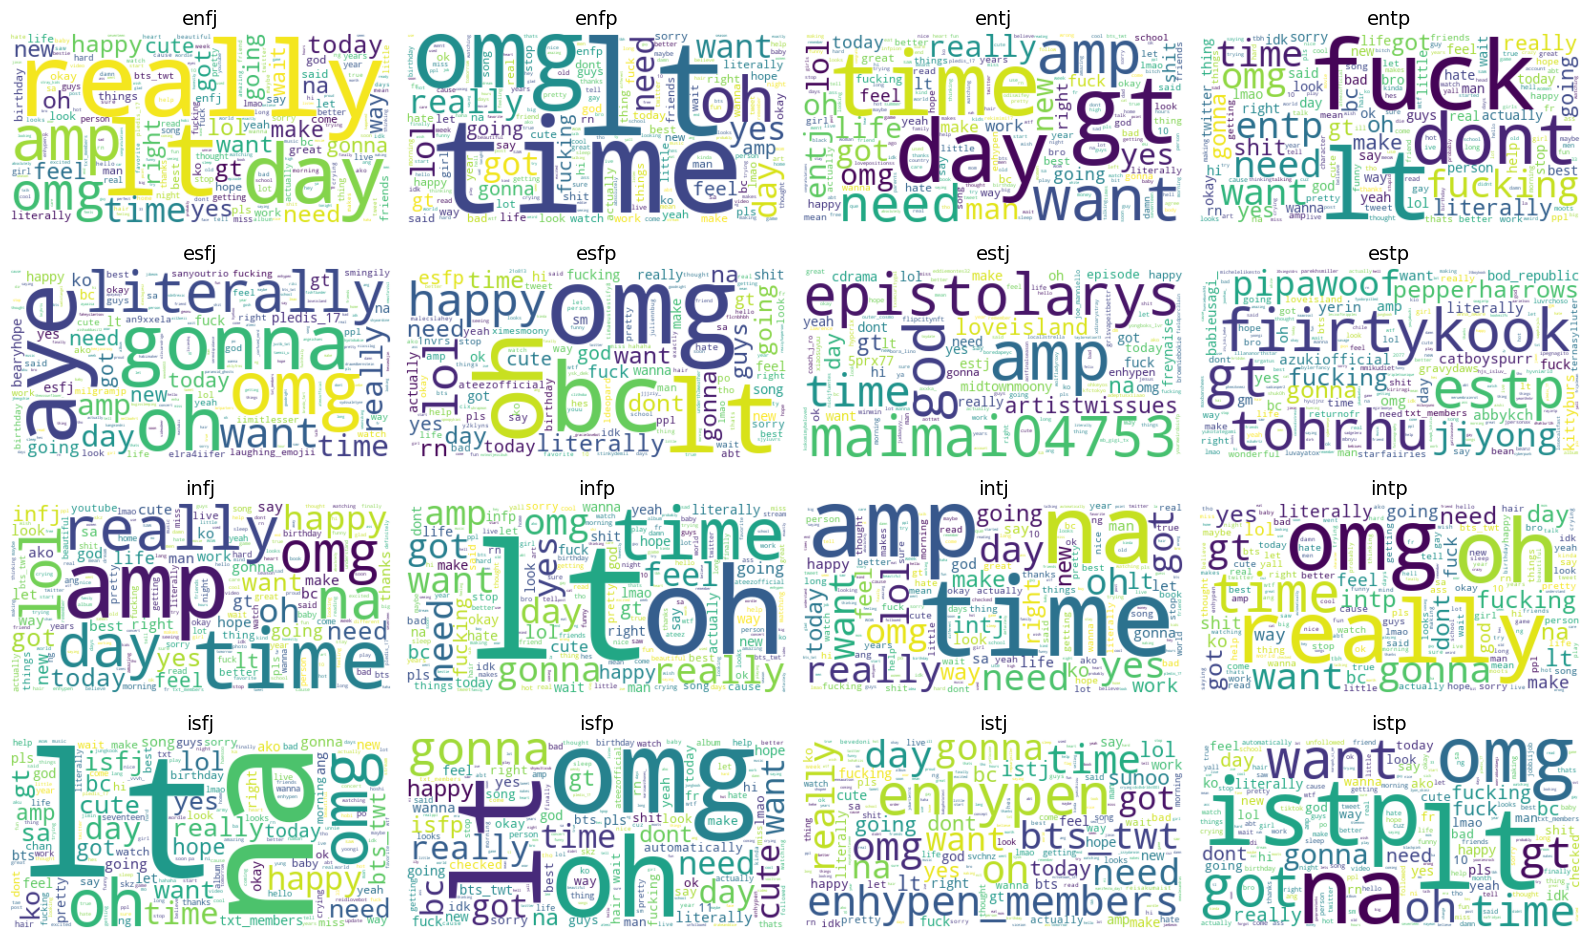

In [8]:
mean_tfidf_by_label_np = mean_tfidf_by_label.to_numpy()
features_names = vectorizer.get_feature_names_out()

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
fig.subplots_adjust(left=0.02, right=0.03, top=0.92, bottom=0.02, wspace=0.1, hspace=0)  

for idx, (ax, tfidf_scores) in enumerate(zip(axes.flatten(), mean_tfidf_by_label_np)):
    label_idx = int(mean_tfidf_by_label.index[idx])
    label = class_map[label_idx][0] 

    tfidf_dict = dict(zip(features_names, tfidf_scores))
    wordcloud_tfidf = WordCloud(background_color='white').generate_from_frequencies(tfidf_dict)
    
    ax.imshow(wordcloud_tfidf, interpolation='bilinear')
    ax.set_title(label,fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()
